# Logistic Regression

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
Bank = pd.read_csv("/Bank.csv",delimiter=";")
Bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
Bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
Bank['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [5]:
# Applying lable encoder y column  [0-NO & 1-YES]
label_encoder = preprocessing.LabelEncoder()
Bank['y'] = label_encoder.fit_transform(Bank['y']) 
Bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [6]:
Bank["job"].unique(),Bank["marital"].unique(),Bank["education"].unique(),Bank["contact"].unique(),Bank["poutcome"].unique()

(array(['management', 'technician', 'entrepreneur', 'blue-collar',
        'unknown', 'retired', 'admin.', 'services', 'self-employed',
        'unemployed', 'housemaid', 'student'], dtype=object),
 array(['married', 'single', 'divorced'], dtype=object),
 array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object),
 array(['unknown', 'cellular', 'telephone'], dtype=object),
 array(['unknown', 'failure', 'other', 'success'], dtype=object))

In [7]:
# Label-Encoder for categorical variables
Bank["marital"] = label_encoder.fit_transform(Bank["marital"])       # 0-Divorced,1-Married,2-Single
Bank["education"] = label_encoder.fit_transform(Bank["education"])   # 0-Primary,1-Secondary,2-Tertiary,3-Unknown
Bank["default"] = label_encoder.fit_transform(Bank["default"])       # 0-No,1-Yes
Bank["housing"] = label_encoder.fit_transform(Bank["housing"])       # 0-No,1-Yes     
Bank["loan"] = label_encoder.fit_transform(Bank["loan"])             # 0-No,1-Yes
Bank["contact"] = label_encoder.fit_transform(Bank["contact"])       # 0-Cellular,1-Telephone,2-Unknown
Bank["poutcome"] = label_encoder.fit_transform(Bank["poutcome"])     # 0-Failure,1-Other,2-Success,3-Unknown
Bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,1,2,0,2143,1,0,2,5,may,261,1,-1,0,3,0
1,44,technician,2,1,0,29,1,0,2,5,may,151,1,-1,0,3,0
2,33,entrepreneur,1,1,0,2,1,1,2,5,may,76,1,-1,0,3,0
3,47,blue-collar,1,3,0,1506,1,0,2,5,may,92,1,-1,0,3,0
4,33,unknown,2,3,0,1,0,0,2,5,may,198,1,-1,0,3,0


In [8]:
# Dummies for other variables to make the data numerical
Bank = pd.get_dummies(Bank)
Bank.head()

,age,marital,education,default,balance,housing,loan,contact,day,duration,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,1,2,0,2143,1,0,2,5,261,...,0,0,0,0,0,0,1,0,0,0
1,44,2,1,0,29,1,0,2,5,151,...,0,0,0,0,0,0,1,0,0,0
2,33,1,1,0,2,1,1,2,5,76,...,0,0,0,0,0,0,1,0,0,0
3,47,1,3,0,1506,1,0,2,5,92,...,0,0,0,0,0,0,1,0,0,0
4,33,2,3,0,1,0,0,2,5,198,...,0,0,0,0,0,0,1,0,0,0


In [9]:
Bank.shape

(45211, 39)

This converts our data variables into numerical.

In [10]:
# to change the y variable position as it will be easy to split the data
col=Bank["y"]
Bank.drop(labels=["y"],axis=1,inplace = True)
Bank.insert(0,"y", col)
Bank.head()

,y,age,marital,education,default,balance,housing,loan,contact,day,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0,58,1,2,0,2143,1,0,2,5,...,0,0,0,0,0,0,1,0,0,0
1,0,44,2,1,0,29,1,0,2,5,...,0,0,0,0,0,0,1,0,0,0
2,0,33,1,1,0,2,1,1,2,5,...,0,0,0,0,0,0,1,0,0,0
3,0,47,1,3,0,1506,1,0,2,5,...,0,0,0,0,0,0,1,0,0,0
4,0,33,2,3,0,1,0,0,2,5,...,0,0,0,0,0,0,1,0,0,0


In [11]:
Bank.shape

(45211, 39)

In [12]:
# Dividing our data into input and output variables  
X = Bank.iloc[:,1:]
Y = Bank.iloc[:,0]

In [13]:
# splitting the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33,random_state=0)

In [14]:
#creating instance of Logistic regression model and fit the model
classifier = LogisticRegression().fit(X_train,Y_train)

In [15]:
#Predict for X_test dataset
y_pred = classifier.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [16]:
#Dataframe for Actual and predicted values
y_pred_df= pd.DataFrame({'actual': Y_test,'predicted_prob': y_pred})
y_pred_df.head()

,actual,predicted_prob
14001,0,0
32046,1,1
13318,0,0
42991,0,0
14237,0,0


In [17]:
# Confusion Matrix for the model accuracy
confusion_matrix = confusion_matrix(Y_test,y_pred)
print(confusion_matrix)

[[12905   258]
 [ 1440   317]]


In [18]:
#Calculating Accuracy manually
#TP+TN / TP + FP + FN + TN
((12905+317)/(12905+258+1440+317))*100

88.61930294906166

In [19]:
#check the accuracy
print('Accuracy: {:.2f}'.format(classifier.score(X_test, Y_test)*100),"%")

Accuracy: 88.62 %


In [20]:
#classification report with measuring accuracies
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     13163
           1       0.55      0.18      0.27      1757

    accuracy                           0.89     14920
   macro avg       0.73      0.58      0.61     14920
weighted avg       0.86      0.89      0.86     14920



Model Accuracy is good enough to perform predictions.

**ROC Curve**

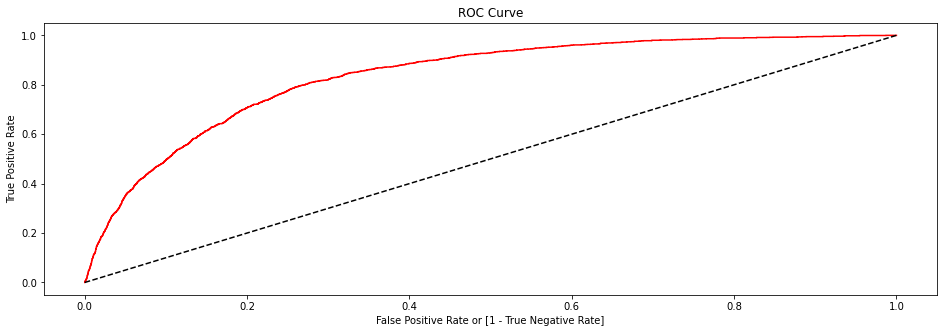

In [21]:
prob=classifier.predict_proba (X_test) [:,1]
fpr, tpr, thresholds = roc_curve(Y_test,prob)  #x,y axis

auc = roc_auc_score(Y_test, y_pred)

fig=plt.figure(figsize=(16,5))
plt.plot(fpr, tpr, color='r', label='logit model ( area  = %0.2f)'%auc) 
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate');

In [22]:
auc*100

58.04103887031615

**Prediction with New Data**

In [23]:
#creating new data by inputing values 
new_data=pd.DataFrame({'age':25, 'marital':2, 'education':1, 'default':0, 'balance':810, 'housing':0,
       'loan':1, 'contact':1, 'day':2, 'duration':95, 'campaign':1, 'pdays':-1, 'previous':0,
       'poutcome':2, 'job_admin.':0, 'job_blue-collar':0, 'job_entrepreneur':0,
       'job_housemaid':0, 'job_management':0, 'job_retired':0, 'job_self-employed':0,
       'job_services':0, 'job_student':1, 'job_technician':0, 'job_unemployed':0,
       'job_unknown':0, 'month_apr':0, 'month_aug':0, 'month_dec':0, 'month_feb':0,
       'month_jan':0, 'month_jul':0, 'month_jun':0, 'month_mar':0, 'month_may':0,
       'month_nov':0, 'month_oct':1, 'month_sep':0},index=[1])
new_data

,age,marital,education,default,balance,housing,loan,contact,day,duration,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
1,25,2,1,0,810,0,1,1,2,95,...,0,0,0,0,0,0,0,0,1,0


In [24]:
#Prediction
classifier.predict(new_data)

array([0])